In [1]:
from __future__ import division
import pandas as pd
import glob
import os
from datetime import datetime
import pickle
from PIL import Image
from VAMPIRE_backend import cntarea,cntAR,cntExtent,cntEquiDia,cntsol,bdreg,pca_bdreg,clusterSM,update_csv
from time import time
import numpy as np

In [2]:
N=10 #equidistant points along cell boundary
clnum = 10
modelname='testmodel'
outpth = r'C:\Users\kyuha\PycharmProjects\VAMPIRE_open\Source Code Contour\new code'

In [3]:
modelpth = r'C:\Users\kyuha\PycharmProjects\VAMPIRE_open\Source Code Contour\new code\epidermis\epidermis.pickle'
tilepth = r'\\motherserverdw\Kyu_Sync\Research\Database\Hamamatsu Nanozoomer Temporary Repository\IMCROP20x\IMCROP_processed\TILE'
setpaths = glob.glob(os.path.join(tilepth,'*'))
setID = [os.path.basename(_).split('_')[1] for _ in setpaths] #patient id
condition = [os.path.basename(_).split('_')[3] for _ in setpaths] #section id
setpaths = [os.path.join(*[_,'out','json']) for _ in setpaths]

In [4]:
def cellclass(cnt):
    celltype = dlim.getpixel((round(cnt[0]),round(cnt[1])))
    return celltype

In [11]:
jsnucs = pd.DataFrame()
imuniques=[]
dlims=[]
for setidx, setpath in enumerate(setpaths[0:1]):
    # patientdir = r'\\motherserverdw\Kyu_Sync\Research\Database\Hamamatsu Nanozoomer Temporary Repository\IMCROP20x\IMCROP_processed\TILE\imID_8_sec_1'
    # jsondir = os.path.join(*[patientdir,'out','json'])
    start = time()
    jsondir = setpath
    # if os.path.exists(os.path.join(jsondir,'boundary.pkl')):continue
    jsons = glob.glob(os.path.join(jsondir,'*json'))
    dldir = os.path.dirname(os.path.dirname(jsondir)).replace('TILE','DLTILE')
    # dls = glob.glob(os.path.join(dldir,'*tif'))
    jsnucs = pd.DataFrame()
    if len(jsons)==0:
        print(setidx)
        continue
    for js in jsons:
        jss = pd.read_json(js)
        imid = os.path.splitext(os.path.basename(js))[0]
        dl = os.path.join(dldir,imid+'.tif')
        dlim = Image.open(dl)
        dlims.append(np.array(dlim))
        imuniques.append(np.max(np.unique(dlim)))
        jsnuc = jss['nuc'].apply(pd.Series)
        if len(jsnuc)==0:continue
        jsnuc = jsnuc.drop(['type_prob'], axis=1).reset_index(drop=True)
        jsnuc['celltype'] = jsnuc['centroid'].apply(lambda row: cellclass(row))
        jsnucs = pd.concat([jsnucs,jsnuc],ignore_index=True)
    jsnucs = jsnucs[jsnucs['contour'].map(len) > 5]
    jsnucs.to_pickle(os.path.join(jsondir,'boundary.pkl'))
    print(os.path.join(jsondir,'boundary.pkl'))
    print(setidx,round(time()-start),'seconds')

\\motherserverdw\Kyu_Sync\Research\Database\Hamamatsu Nanozoomer Temporary Repository\IMCROP20x\IMCROP_processed\TILE\imID_100_sec_1\out\json\boundary.pkl
0 7 seconds


In [14]:
jsnucs

,bbox,centroid,contour,type,celltype
0,"[[965, 965], [981, 987]]","[975.4083969465648, 972.3931297709923]","[[973, 965], [972, 966], [971, 966], [970, 967...",None,2
1,"[[957, 881], [999, 948]]","[911.4903100775193, 976.8914728682171]","[[944, 957], [943, 958], [940, 958], [939, 959...",None,2
2,"[[982, 954], [996, 971]]","[961.8663101604278, 988.4652406417113]","[[960, 982], [959, 983], [958, 983], [957, 984...",None,2
3,"[[0, 932], [9, 947]]","[938.7142857142857, 3.789915966386554]","[[933, 0], [933, 1], [932, 2], [932, 6], [934,...",None,2
4,"[[30, 927], [40, 942]]","[934.1008403361344, 35.016806722689076]","[[933, 30], [932, 31], [930, 31], [927, 34], [...",None,2
...,...,...,...,...,...
12839,"[[438, 147], [448, 158]]","[152.15853658536585, 442.6341463414634]","[[151, 438], [149, 440], [148, 440], [147, 441...",None,10
12840,"[[475, 151], [485, 166]]","[157.72941176470587, 479.81176470588235]","[[160, 475], [160, 476], [159, 477], [158, 477...",None,10
12841,"[[496, 456], [509, 471]]","[462.07766990291265, 501.3495145631068]","[[463, 496], [462, 497], [461, 497], [461, 498...",None,10
12842,"[[537, 424], [546, 433]]","[427.89473684210526, 540.6666666666666]","[[425, 537], [424, 538], [424, 541], [425, 541...",None,10


In [15]:
np.unique(jsnucs['celltype'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 18, 20],
      dtype=int64)

In [17]:
imuniques


[12,
 22,
 12,
 13,
 13,
 12,
 13,
 13,
 13,
 13,
 12,
 23,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 23,
 14,
 23,
 20,
 12,
 12,
 12,
 12,
 12,
 12,
 23,
 12,
 12,
 23,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 23,
 22,
 13,
 12,
 12,
 12,
 12,
 12,
 13,
 12,
 12,
 23,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 20,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 12,
 13,
 23,
 23,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 12,
 12,
 12,
 12,
 13,
 12,
 22,
 22,
 13,
 12,
 12,
 12,
 12,
 12,
 13,
 19,
 22,
 12,
 12,
 13,
 13,
 12,
 12,
 13,
 23,
 12,
 12,
 13,
 12,
 12,
 12,
 12,
 13,
 23,
 21,
 13,
 13,
 12,
 12,
 12,
 12,
 13,
 22,
 20,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 23,
 23,
 12,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 22,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 24,
 12,
 12,
 12,
 12,
 12,
 12,
 12]

In [18]:
np.unique(dlims[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=uint8)

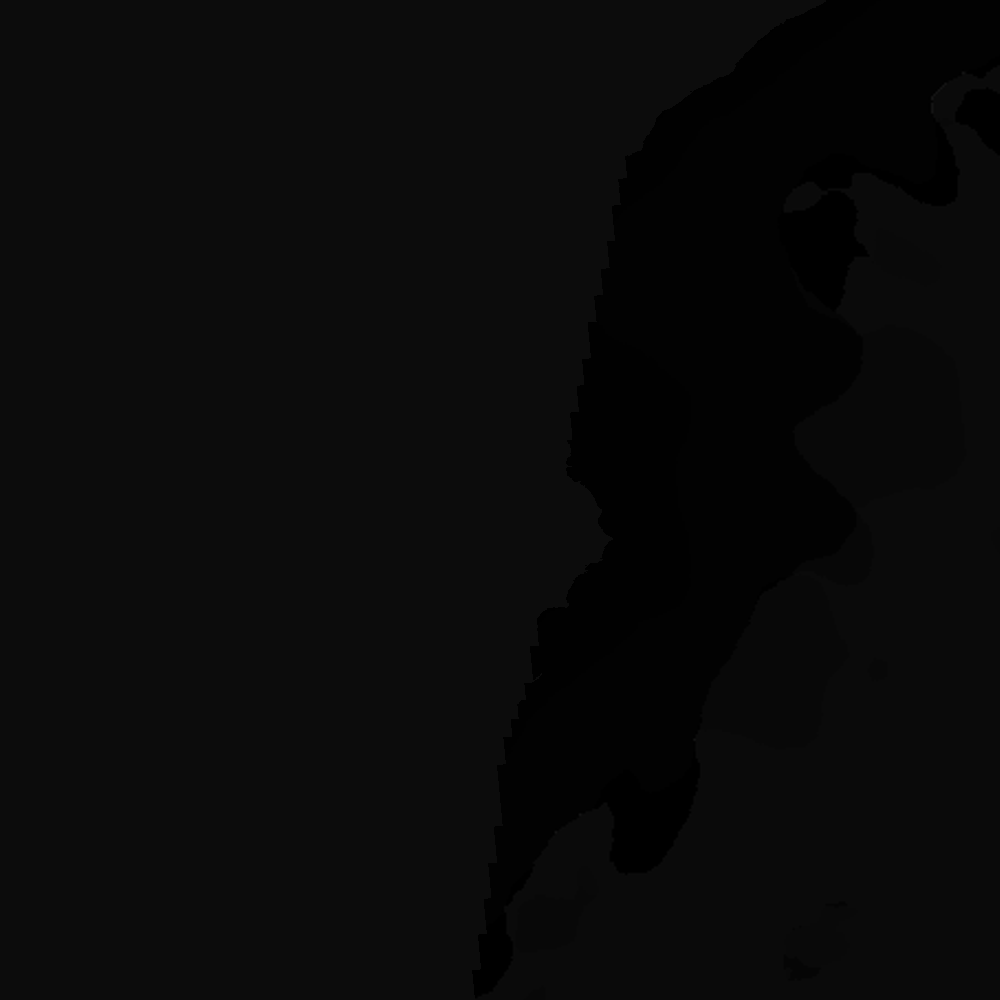

In [21]:
Image.fromarray(dlims[1])

In [ ]:
start = time()
pkls = pd.DataFrame()
for setidx, setpath in enumerate(setpaths):
    start = time()
    if not os.path.exists(os.path.join(setpath,'boundary.pkl')):continue
    pkl = pd.read_pickle(os.path.join(setpath,'boundary.pkl'))
    pkls = pd.concat([pkls,pkl],ignore_index=True)
print(round(time()-start),'seconds')
pkls

In [ ]:
start = time()
pkls = pkls[pkls['contour'].map(len) > 5] # need at least 5 points to quantify morphology
pkls['Area'] = pkls['contour'].apply(lambda row: cntarea(row))
pkls['AR'] = pkls['contour'].apply(lambda row: cntAR(row))
pkls['Sol'] = pkls['contour'].apply(lambda row: cntExtent(row))
pkls['Extent'] = pkls['contour'].apply(lambda row: cntEquiDia(row))
pkls['EquiDia'] = pkls['contour'].apply(lambda row: cntsol(row))
pkls = pkls.drop(['bbox','centroid','type'], axis=1)
print(round(time()-start),'seconds')
pkls

In [ ]:
pkls = pkls[pkls['celltype']< 12]
pkls

In [ ]:
lens=[]
for i in range(13):
    lens.append(len(pkls[pkls['celltype']==i]))
lens

In [ ]:
from matplotlib import pyplot as plt
start = time()
a=plt.hist(pkls['celltype'])
print(round(time()-start),'seconds')
a

In [ ]:
import numpy as np
np.unique(pkls['celltype'])

In [ ]:
np.histogram(pkls['celltype'],bins=range(12))

In [ ]:
tags = ['corneum','spinosum','hairshaft','hairfollicle','smoothmuscle','oil','sweat','nerve','blood','ECM','fat']
for idx,tag in enumerate(tags):
    modelname = tag
    bd1 = pkls[pkls['celltype']==idx+1].reset_index()
    B=bd1['contour']
    VamModel = {
                "N": [],
                "bdrn": [],
                "mdd": [],
                "pc": [],
                "clnum": [],
                "pcnum": [],
                "mincms": [],
                "testmean": [],
                "teststd": [],
                "boxcoxlambda": [],
                "C": [],
                "Z": []
            }

    build_model = True
    bdpc, VamModel = bdreg(B, N, VamModel, build_model)
    score, VamModel = pca_bdreg(bdpc, VamModel, True)
    pcnum = None # none is 20 by default
    IDX, IDX_dist, VamModel, goodness = clusterSM(outpth, score, bdpc, clnum, pcnum, VamModel, True, None, None,modelname)


    if os.path.exists(os.path.join(*[outpth, modelname, modelname+'.pickle'])):
        realtimedate = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
        f = open(os.path.join(*[outpth, modelname, modelname+'_'+realtimedate+'.pickle']), 'wb')
    else:
        f = open(os.path.join(*[outpth, modelname, modelname+'.pickle']), 'wb')
    pickle.dump(VamModel, f)
    f.close()


In [ ]:
modelname = 'epidermis'
bd1 = pkls[pkls['celltype']==3].reset_index()
B=bd1['contour']
VamModel = {
            "N": [],
            "bdrn": [],
            "mdd": [],
            "pc": [],
            "clnum": [],
            "pcnum": [],
            "mincms": [],
            "testmean": [],
            "teststd": [],
            "boxcoxlambda": [],
            "C": [],
            "Z": []
        }

build_model = True
bdpc, VamModel = bdreg(B, N, VamModel, build_model)
score, VamModel = pca_bdreg(bdpc, VamModel, True)
pcnum = None # none is 20 by default
IDX, IDX_dist, VamModel, goodness = clusterSM(outpth, score, bdpc, clnum, pcnum, VamModel, True, None, None,modelname)


if os.path.exists(os.path.join(*[outpth, modelname, modelname+'.pickle'])):
    realtimedate = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    f = open(os.path.join(*[outpth, modelname, modelname+'_'+realtimedate+'.pickle']), 'wb')
else:
    f = open(os.path.join(*[outpth, modelname, modelname+'.pickle']), 'wb')
pickle.dump(VamModel, f)
f.close()

In [ ]:
experimental = False


In [ ]:
modelpth = r'C:\Users\kyuha\PycharmProjects\VAMPIRE_open\Source Code Contour\new code\epidermis\epidermis.pickle'
try:
    f = open(modelpth, 'rb')
except:
    print('the model does not exist. please replace model name to the one you built')
vampire_model = pickle.load(f)
N = vampire_model['N']
clnum = vampire_model['clnum']
pcnum = vampire_model['pcnum']

In [ ]:
for setidx, setpath in enumerate(setpaths[12:]):
    try:
        print(setidx,setpath)
        pkl = pd.read_pickle(os.path.join(setpath,'boundary.pkl'))
        pkl['AR'] = pkl['contour'].apply(lambda row: cntAR(row))
        pkl['Sol'] = pkl['contour'].apply(lambda row: cntExtent(row))
        pkl['Extent'] = pkl['contour'].apply(lambda row: cntEquiDia(row))
        pkl['EquiDia'] = pkl['contour'].apply(lambda row: cntsol(row))

        B = pkl['contour']
        pkl = pkl.drop(['bbox','centroid','contour','type'], axis=1)
        bdpc, vampire_model = bdreg(B, N, vampire_model, build_model)
        score, vampire_model = pca_bdreg(bdpc, vampire_model, build_model)
        IDX, IDX_dist, VamModel, goodness = clusterSM(outpth, score, bdpc, clnum, pcnum, vampire_model, False, condition[setidx], setID[setidx],modelname)

        datasheet = 'VAMPIRE datasheet ' + tag + '.csv'
        goodness = goodness.transpose()
        pkl['Shape mode']= pd.Series(IDX)
        pkl['Distance from cluster center'] = pd.Series(IDX_dist)
        for idx,column in enumerate(goodness):
            pkl['probability of shape mode '+str(idx)] = column
        pkl.to_csv(os.path.join(setpath, datasheet), index=False)
    except: continue

In [ ]:
# update_csv(IDX, IDX_dist, tag[setidx], setpath, goodness=goodness)